# Employee Review Analysis - Part 1 Data Cleaning & EDA

#### Dataset:
This dataset is about a company's employee review on Glassdoor. We web scrapped the data from Glassdoor with its written permission. There are 6675 reviews with numerical ratings and text comments. To make this analysis general, the company name has been replaced by"Anonymous". 

## Problem Statement
The goal of this analysis is to analyze anonymous employee reviews submitted on Glassdoor, with the hope to help employers gain real insights on their employee engagement. The analysis will answer these questions: what employees like and dislike about their company? Has the company’s reputation gotten better or worse in the recent year? What are the keywords that people are talking about this company? What can these companies do to improve employee engagement?

## Data Importing

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid")


Bad key "text.kerning_factor" on line 4 in
c:\anaconda3\envs\py36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# use the first column as index, parse 'Comment Datetime' to datetime object

df = pd.read_csv('company1_review.csv',index_col=[0], parse_dates=['Comment Datetime']) 
df.head()

,Con,Career Opportunities,Author Location,Summary,Senior Management,Pro,Recommendation,Culture & Values,Author Years,Overall Rating,Compensation and Benefits,Author Title,Work/Life Balance,Comment Datetime
0,- potentially slow upward movement beyond the ...,5.0,"Salt Lake City, UT","""Awesome Culture""",4.0,- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",5.0,I have been working at Anonymous Investments f...,5.0,5.0,Current Employee - Investment Solutions Repres...,5.0,2020-06-18
1,Few jobs are off the phones. Call after call g...,NaN,NaN,"""Great job""",NaN,"Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",NaN,I have been working at Anonymous Investments f...,5.0,NaN,Current Employee - Investment Solutions Repres...,NaN,2020-06-16
2,"Phone call center, must be good on the phones.",5.0,"American Fork, UT","""Great place to work""",4.0,"Excellent benefits, plenty of opportunity to a...",NaN,5.0,I worked at Anonymous Investments full-time fo...,5.0,5.0,Former Employee - High Net Worth Service Assoc...,5.0,2020-06-17
3,Easy to get fired. They don’t always give warn...,4.0,NaN,"""Good environment, not so stable.""",3.0,"Good environment \n\nNice scenery, cafeteria, ...",Recommends,3.0,I worked at Anonymous Investments full-time,4.0,5.0,Former Employee - Financial Associate,3.0,2020-06-11
4,No cons in my opinion,5.0,"Los Angeles, CA","""Great company""",4.0,Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",5.0,I worked at Anonymous Investments full-time,5.0,4.0,Former Employee - Investment Consultant,5.0,2020-06-11


In [3]:
df.shape

(6675, 14)

In [4]:
df.columns

Index(['Con', 'Career Opportunities', 'Author Location', 'Summary',
       'Senior Management', 'Pro', 'Recommendation', 'Culture & Values',
       'Author Years', 'Overall Rating', 'Compensation and Benefits',
       'Author Title', 'Work/Life Balance', 'Comment Datetime'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6674
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Con                        6675 non-null   object        
 1   Career Opportunities       5952 non-null   float64       
 2   Author Location            4054 non-null   object        
 3   Summary                    6675 non-null   object        
 4   Senior Management          5915 non-null   float64       
 5   Pro                        6675 non-null   object        
 6   Recommendation             5776 non-null   object        
 7   Culture & Values           5097 non-null   float64       
 8   Author Years               6675 non-null   object        
 9   Overall Rating             6675 non-null   float64       
 10  Compensation and Benefits  5961 non-null   float64       
 11  Author Title               5649 non-null   object        
 12  Work/L

## Data Cleaning

In [6]:
# check missing values

df.isnull().sum()

Con                             0
Career Opportunities          723
Author Location              2621
Summary                         0
Senior Management             760
Pro                             0
Recommendation                899
Culture & Values             1578
Author Years                    0
Overall Rating                  0
Compensation and Benefits     714
Author Title                 1026
Work/Life Balance             719
Comment Datetime                0
dtype: int64

### Strategy of Handling Missing Values
**Note:** There are 8 columns with missing values. These columns include numerical rating columns and categorical string columns. We could have filled the missing ratings with each column's median value, however, in order to make this analysis more accurate, our strategy is to **leave NaN numerical rating as is, and fill the missing categorical information with 'Unknown'**, so we can differentiate it from the originally existed data.

In [7]:
# sort the dataframe so all string columns are listed together

rating_columns = df.select_dtypes(include = ['float64'])
string_columns = df.select_dtypes(exclude = ['float64'])
df_column_sorted = pd.concat([string_columns,rating_columns], axis = 1)

df_column_sorted.head()

,Con,Author Location,Summary,Pro,Recommendation,Author Years,Author Title,Comment Datetime,Career Opportunities,Senior Management,Culture & Values,Overall Rating,Compensation and Benefits,Work/Life Balance
0,- potentially slow upward movement beyond the ...,"Salt Lake City, UT","""Awesome Culture""",- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",I have been working at Anonymous Investments f...,Current Employee - Investment Solutions Repres...,2020-06-18,5.0,4.0,5.0,5.0,5.0,5.0
1,Few jobs are off the phones. Call after call g...,NaN,"""Great job""","Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",I have been working at Anonymous Investments f...,Current Employee - Investment Solutions Repres...,2020-06-16,NaN,NaN,NaN,5.0,NaN,NaN
2,"Phone call center, must be good on the phones.","American Fork, UT","""Great place to work""","Excellent benefits, plenty of opportunity to a...",NaN,I worked at Anonymous Investments full-time fo...,Former Employee - High Net Worth Service Assoc...,2020-06-17,5.0,4.0,5.0,5.0,5.0,5.0
3,Easy to get fired. They don’t always give warn...,NaN,"""Good environment, not so stable.""","Good environment \n\nNice scenery, cafeteria, ...",Recommends,I worked at Anonymous Investments full-time,Former Employee - Financial Associate,2020-06-11,4.0,3.0,3.0,4.0,5.0,3.0
4,No cons in my opinion,"Los Angeles, CA","""Great company""",Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",I worked at Anonymous Investments full-time,Former Employee - Investment Consultant,2020-06-11,5.0,4.0,5.0,5.0,4.0,5.0


Let's take a look at a few text samples.

In [8]:
# randomly print out 3 records that have text

for i in range(4,7):
    print(df['Author Years'][i])
    print(df['Author Title'][i])
    print(df['Summary'][i])
    print(df['Pro'][i])
    print(df['Con'][i])
    print('====================')

I worked at Anonymous Investments full-time
Former Employee - Investment Consultant
"Great company"
Good work environment in my opinion
No cons in my opinion
I have been working at Anonymous Investments full-time
Current Employee - Marketing Associate
"Great place to work"
Great benefits, inclusive community, and highly collaborate people to work with.
I don’t have any cons
I have been working at Anonymous Investments full-time for more than 8 years
Current Employee - Senior Software Test Engineer
"Good company to work for"
Good culture and opportunities to grow
Moving jobs to offshore for cost savings


### Extract Categorical Information

**1. Extract information of `Current/Former Employee`from column `Author Year`.**

Of note, there is a column'Author Title" which has "Current Employee" or "Former Employee" information, but there are more than 2000 null values. The other column "Author Years" column has no null value and the text contains relevant information about current/former employee flags, notice the string in column "Author Years" always starts with either "I have been working" or "I worked at".Hence, we can use "Author Year" to extract employee type data. 
 

**2. Extract employee `Tenure` from column `Author Years`.**

Below are some sample data:

* "I have been working at Anonymous Investments full-time for more than a year"<br>
* "I have been working at Anonymous Investments full-time for more than 3 years"<br>
* "I worked at Anonymous Investments full-time for more than 5 years"

Notice there are 3 different patterns.There could be a number before year(s)(i.e. 3 years) or a letter before year (i.e. 'a year') or 'more than/less than'. First, we will replace 'a year' as '1 year', then find all 'more than/less than'. If there is 'more than', we will add 0.5 year to the number of years, if there is 'less than', we will minus 0.5 year from the number of years. If no tenure is specified, we will set it to NaN.

**3. Extract information of `Full-time/Part-time Employee` from column `Author Year`.**

For full-time / part-time flags, we will get that information from "Author Years" column as well. If this information is not specified, we will default it to NaN.

**4. Extract `Recommended`, `Positive Outlook`, `Approves of CEO` from column`Recommendation`.**

Since the column 'Recommendation' consists of 3 pieces of information, we would need to separate them and make each feature as one column.

**5. Extract employee location, job title from column `Author Title`.**

As a national company, employees in different states can have different engagement, therefore location information is meaningful. However, we don't need to get the specific city, only the state information is sufficient. As of jot titles, most job titles have this string format "Current Employee - Financial Associate", so we need to extract the job title after the "-". However, there are more than 1000 records missing this information, we will fill in the information with "Unkown Title". After that, we are going to remove "senior" and "principal" to get fewer job categories.

In [9]:
# define a function to extract categorical information - round 1

def extract_cat_data(row):
    
    # 1. extract current/former employee flags from'Author Years'
    if not pd.isna(row['Author Years']):
        if "have been working" in row['Author Years']:
            row['Current Employee'] = 1
        elif "I worked at" in row['Author Years']:
            row['Current Employee'] = 0
        else:
            row['Current Employee'] = Np.NaN          
    
    # 2. extract tenure from 'Author Years'
    string_to_number = row["Author Years"].replace("a year", "1 year")  # replace 'a year' with '1 year'
    tenure = re.findall(r'\d+', string_to_number)                       # find the digit in the string
    
    if tenure: 
        row['Tenure'] = int(tenure[0])                 # use the number in the list
        if 'more than' in row["Author Years"]:         
            row['Tenure'] += 0.5                       # add 0.5 year if there is 'more than'
        elif 'less than' in row["Author Years"]:       
            row['Tenure'] -=0.5                        # minus 0.5 year if there is 'less than'
    else:
        row['Tenure'] = np.NaN                         # if no tenure is specified, set to NaN
    
    
     # 3. extract full-time/part-time flags from 'Author Years'
    if 'full-time' in string_to_number or 'full time' in string_to_number:
        row['Full-time'] = 1
    elif 'part-time' in string_to_number or 'part time' in string_to_number:
        row['Full-time'] = 0
    else:
        row['Full-time'] = np.NaN                       # if not specified, set it NaN
 
    
    # 4. extract 'Recommended','Positive Outlook','Approves of CEO' from column'Recommendation' 
    row['Recommended'] = 0
    row['Positive Outlook'] = 0
    row['Approves of CEO'] = 0
    
    if not pd.isna(row['Recommendation']):
        if 'Recommends' in row['Recommendation']:
            row['Recommended'] = 1
        elif "Doesn't Recommend" in row['Recommendation']:
            row['Recommended'] = -1
        
        elif 'Positive Outlook' in row['Recommendation']:
            row['Positive Outlook'] = 1
        elif 'Negative Outlook' in row['Recommendation']:   
            row['Positive Outlook'] = -1
        elif 'Neutral Outlook' in row['Recommendation']: 
            row['Positive Outlook'] = 0
            
        elif 'Approves of CEO' in row['Recommendation']:
            row['Approves of CEO'] = 1
        elif 'Disapproves of CEO' in row['Recommendation']:
            row['Approves of CEO'] = -1
        elif 'No opinion of CEO' in row['Recommendation']:   
            row['Approves of CEO'] = 0

    return row

df_cat_extracted = df.apply(extract_cat_data, axis=1)

In [10]:
# define a function to extract categorical information - round 2

def extract_loc_job(row):
    
    # 1. extract location
    if not pd.isna(row['Author Location']):
        if re.search(r'[A-Z]{2}$',row['Author Location']): 
            # extract the last 2 captical letters as state
            row['State'] = re.search(r'[A-Z]{2}$',row['Author Location'])[0]
        else:
            row['State'] = np.NaN      
    else:
            row['State'] = np.NaN                               
    
    # 2. extract job title
    if pd.notnull(row['Author Title']) and row['Author Title']: 
        if '-'in row['Author Title']:  # author title usually starts like this: "Current Employee - Analyst" 
            row['Job Title'] = row['Author Title'].split("-")[1]  # get the 2nd element after the split 
        else:
            row['Job Title'] = row['Author Title']
    else:
         row['Job Title'] = 'Unknown Title'
    # remove "senior" and "principal" to get fewer job categories 
    # remove the beginning & end space
    row['Job Title'] = row['Job Title'].replace('Senior',"").replace('Principal',"").strip() 
    
    return row      
            
df_loc_job_filled = df_cat_extracted.apply(extract_loc_job,axis=1)    

In [11]:
# drop these columns since the information is extracted from them

df_cleaned = df_loc_job_filled.drop(columns = ['Recommendation','Author Title','Author Years','Author Location'])

### Reorder Columns
Rearrange columns to make categorical columns together and rating columns together.

In [12]:
# reorder the columns

df_cleaned = df_cleaned[['Comment Datetime', 'State', 'Job Title','Tenure','Current Employee','Full-time',
                          'Summary','Pro','Con','Recommended', 'Positive Outlook','Approves of CEO',
                          'Overall Rating','Career Opportunities','Compensation and Benefits',
                          'Work/Life Balance','Senior Management','Culture & Values']]

In [13]:
# set 'Comment Datetime' as index

df_cleaned.set_index('Comment Datetime',inplace=True)

In [14]:
# sort dataframe by index

df_cleaned = df_cleaned.sort_index()
df_cleaned.head(1)

,State,Job Title,Tenure,Current Employee,Full-time,Summary,Pro,Con,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
Comment Datetime,,,,,,,,,,,,,,,,,
2008-06-11,CA,Sales,NaN,1,NaN,"""Anonymous - the good and not so good""","Fast paced, sales environment with spunk",squeezing more productivity out of you..,1,0,0,4.0,4.0,3.5,4.0,4.0,NaN


In [15]:
# check missing values one more time

df_cleaned.isnull().sum()

State                        3547
Job Title                       0
Tenure                       2979
Current Employee                0
Full-time                    2094
Summary                         0
Pro                             0
Con                             0
Recommended                     0
Positive Outlook                0
Approves of CEO                 0
Overall Rating                  0
Career Opportunities          723
Compensation and Benefits     714
Work/Life Balance             719
Senior Management             760
Culture & Values             1578
dtype: int64

As mentioned earlier, we are going to leave the missing values without interpolation. Nex, we will do some exploratory analysis.

## Exploratory Data Analysis

In [16]:
df_cleaned.describe()

,Tenure,Current Employee,Full-time,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
count,3696.000000,6675.000000,4581.000000,6675.000000,6675.000000,6675.000000,6675.000000,5952.000000,5961.000000,5956.000000,5915.000000,5097.000000
mean,4.421807,0.562247,0.989959,0.424719,0.003596,0.015730,3.712659,3.427419,3.834592,3.723556,3.224514,3.838925
std,3.450732,0.496147,0.099714,0.789590,0.084730,0.159293,1.111473,1.178823,1.012208,1.144261,1.258911,1.227846
min,0.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.500000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,3.500000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,3.500000,4.000000,4.000000,3.000000,4.000000
75%,5.500000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
max,10.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Boxplot of all ratings

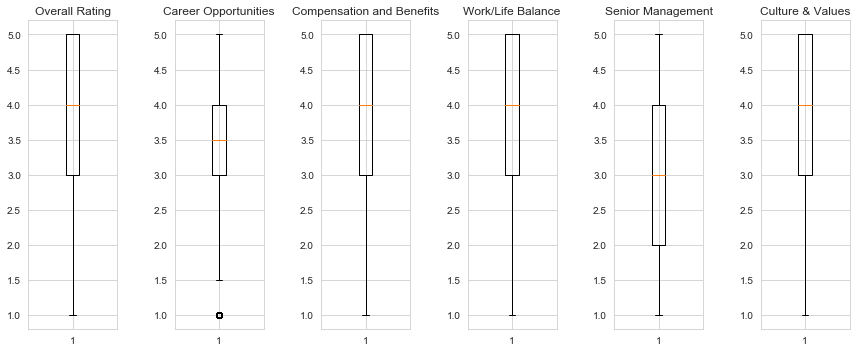

In [17]:
# plot all ratings using boxplots

column_list = ['Overall Rating','Career Opportunities','Compensation and Benefits',
               'Work/Life Balance','Senior Management','Culture & Values']

figure, ax = plt.subplots(1,6,figsize=(12,5))  

for column, curr_ax in zip(column_list, ax.ravel()):  # use ax.ravel() to flatten ax(2 by 3) in order to zip
    curr_ax.boxplot(df_cleaned[column].dropna())      # drop those NaN values    
    curr_ax.set_title(f'{column}')

plt.tight_layout()
plt.show() 

On a scale of 1-5, this company's median overall rating is 4 which is pretty good. Breaking down to 5 categories, employees rated the highest in compensation & benefits, work/life balance and culture & values. Senior management rating's median value is 3, which is the lowest, and career opportunities'median rating is 3.5. Culture & Values has a median rating as 4. There are a few outliers in career opportunities and culture & values.

#### Lineplot of overall ratings over the years

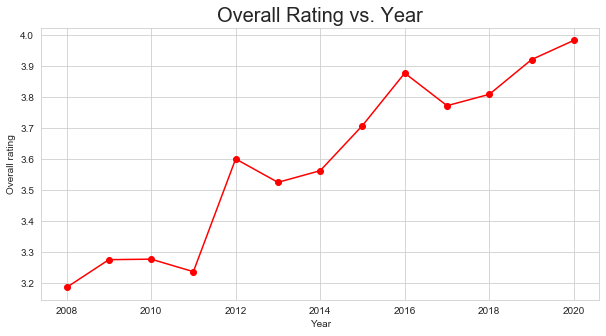

In [18]:
# plot overall rating over the years

from datetime import datetime
fig,ax = plt.subplots(figsize=(10,5))

x = sorted(df_cleaned.index.year.unique())
y = df_cleaned.groupby(df_cleaned.index.year)['Overall Rating'].mean()

ax.plot(x, y, color='red', marker = 'o',label='Overall Rating')
ax.set_title('Overall Rating vs. Year', fontsize=20)
ax.set_xlabel('Year')
ax.set_ylabel('Overall rating')
plt.show()                                    

There is a clear trend that the employee satisfaction has been increasing since 2008 with some small dips in 2011, 2013 and 2017.

#### Bar plot of overall recommendations

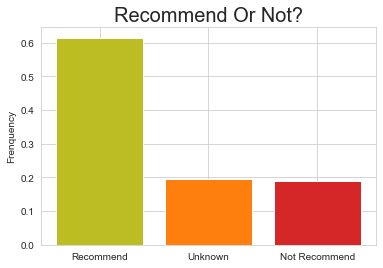

In [19]:
# plot overall recommendations

rec_count = df_cleaned['Recommended'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.bar(['Recommend', 'Unknown','Not Recommend'], rec_count, color=['tab:olive','tab:orange','tab:red'])
ax.set_title('Recommend Or Not?', fontsize=20)
ax.set_ylabel('Frenquency')
plt.show()

Overall, 60% employees recommend this company, 20% do not recommend, another 20% does not answer this question.

#### Bar plots of sub-categories

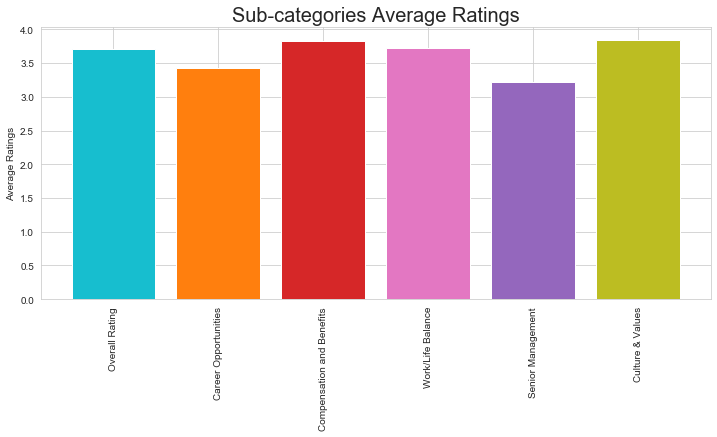

In [20]:
# plot sub categories average ratings

column_list = ['Overall Rating','Career Opportunities','Compensation and Benefits',
               'Work/Life Balance','Senior Management','Culture & Values']

sub_ratings = df_cleaned[column_list].mean()
colors1=['tab:cyan','tab:orange','tab:red','tab:pink','tab:purple','tab:olive']

figure, ax = plt.subplots(figsize=(12,5))  
ax.bar(sub_ratings.index, sub_ratings, color=colors1)

ax.set_title ('Sub-categories Average Ratings', fontsize=20)
ax.set_ylabel ('Average Ratings')
ax.set_xticklabels(sub_ratings.index,rotation=90)
plt.show() 

#### Bar plots of high/low rating states

In [21]:
total_states = df_cleaned.State.nunique()
print(f'Total unique states in the data: {total_states}')

Total unique states in the data: 38


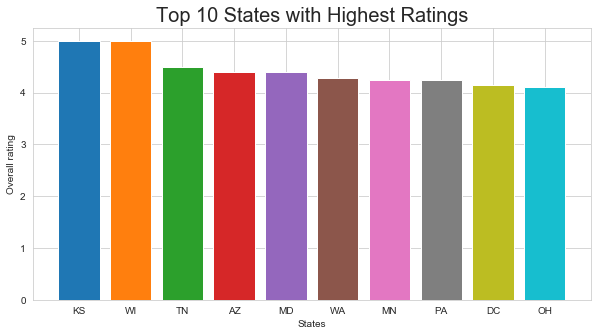

In [22]:
# plot the 10 states with top ratings 

top_10 = df_cleaned.groupby('State')['Overall Rating'].mean().nlargest(10)
colors2 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
           'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(top_10.index,top_10, color=colors2)
ax.set_title('Top 10 States with Highest Ratings', fontsize=20)
ax.set_xlabel('States')
ax.set_ylabel('Overall rating')
plt.show()

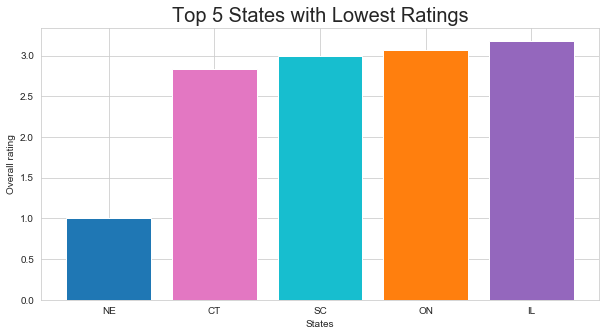

In [23]:
# plot the 5 states with lowest ratings 

lowest_5 = df_cleaned.groupby('State')['Overall Rating'].mean().nsmallest(5)
colors3 = ['tab:blue','tab:pink','tab:cyan','tab:orange','tab:purple']

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(lowest_5.index,lowest_5, color=colors3)
ax.set_title('Top 5 States with Lowest Ratings',fontsize=20)
ax.set_xlabel('States')
ax.set_ylabel('Overall rating')
plt.show()

Looks like employees in KS and WI have the highest employee satisfaction and employees in NE are the unhappest. Of note, the location data indicates 'Author Location', we assumed these employees are based locally in the company's branches in that particular state. If there are substantial remote employees, this conclusion may not be accurate. 

#### Bar plots of overall ratings by employee type

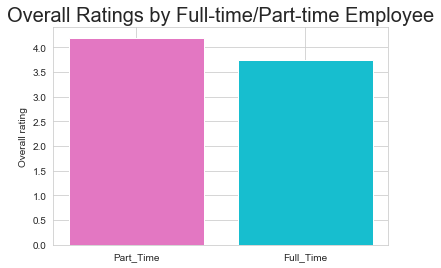

In [24]:
# plot overall rating by full-time/part-time employee

rate_by_fte = df_cleaned.groupby('Full-time')['Overall Rating'].mean()

fig, ax = plt.subplots()
ax.bar(['Part_Time', 'Full_Time'], rate_by_fte,color=['tab:pink','tab:cyan'])
ax.set_title('Overall Ratings by Full-time/Part-time Employee', fontsize=20)
ax.set_ylabel('Overall rating')
plt.show()

Part-time employees have higher satisfaction than full-time employees.

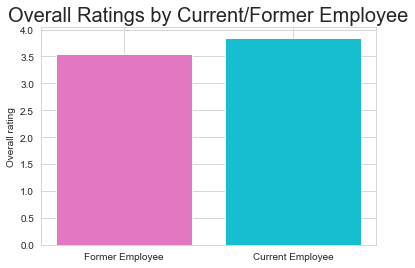

In [25]:
# plot overall rating by current/former employee

rate_by_emp_type = df_cleaned.groupby('Current Employee')['Overall Rating'].mean()

fig, ax = plt.subplots()
ax.bar(['Former Employee', 'Current Employee'], rate_by_emp_type,color=['tab:pink','tab:cyan'])
ax.set_title('Overall Ratings by Current/Former Employee', fontsize=20)
ax.set_ylabel('Overall rating')
plt.show()

Former employees give relatively lower ratings than current employees, this is understandable because unhappy employees tend to leave.

#### Bar plots of most frequent reviewer job titles

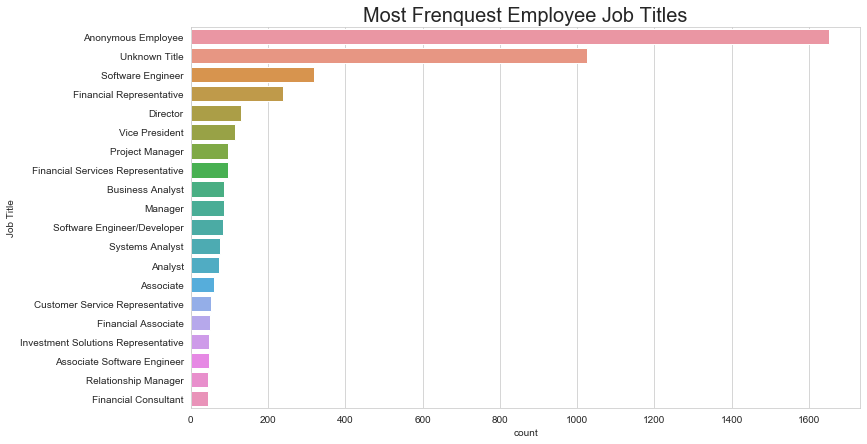

In [26]:
# plot the most frenquest reviewer job titles

top_20_job = df_cleaned['Job Title'].value_counts().nlargest(20)

plt.figure(figsize=(12,7))
sns.countplot(y='Job Title',data=df_cleaned, order=top_20_job.index)
sns.set_context('talk')
plt.title('Most Frenquest Employee Job Titles', fontsize=20)
plt.show()

Most employees choose not to disclose their job titles, for those who disclose their title, they are Software Engineers and Financial Representatives.

#### Bar plots of top job families' overall rating

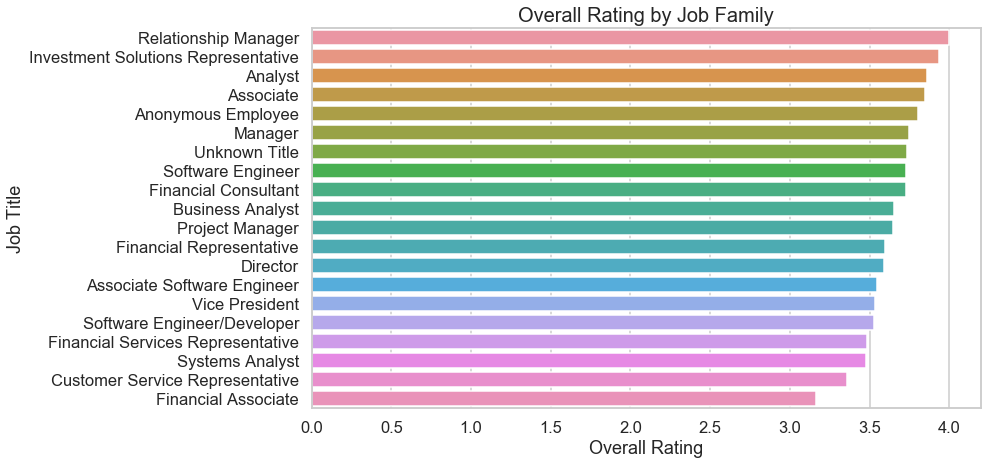

In [27]:
# plot the reviewers in the top 20 job families' overall rating

top_20job_review = df_cleaned.loc[df_cleaned['Job Title'].isin(top_20_job.index), ['Job Title','Overall Rating']]
top_20job_mean_review = top_20job_review.groupby('Job Title')['Overall Rating'].mean().sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(y=top_20job_mean_review.index, x=top_20job_mean_review, hue_order=top_20job_mean_review)
sns.set_context('talk')
plt.title('Overall Rating by Job Family', fontsize=20)
plt.show()

Among the top most frequent job titles, Financial Associate group has the lowest satisfaction and Relationship Managers give the highest ratings.

In [28]:
df_cleaned.to_csv('df_cleaned.csv')

Next, we will move to do further text analysis and topic modeling in a separate Jupyter Notebook.